In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.integrate import odeint
from matplotlib import animation

In [2]:
def f_x(x, r):
    return x*(r-np.exp(x))

def f_y(y, zeta):
    return y**4 -4*y + zeta

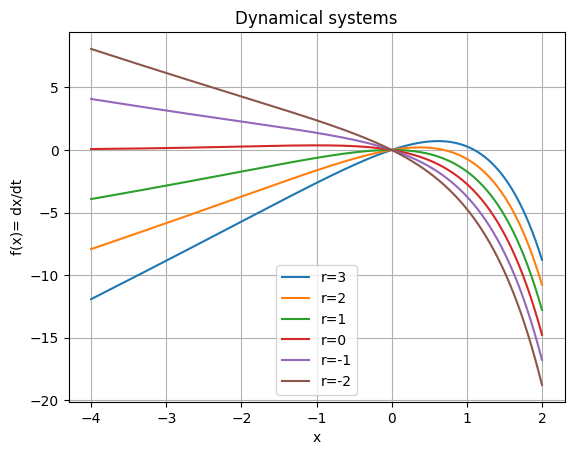

In [3]:
x = np.linspace(-4,2,1000)
list_r = [3,2,1,0,-1,-2]
for r in list_r:
    list_f4 = [f_x(i, r) for i in x]
    plt.plot(x, list_f4, label = f"r={r}")
plt.grid()
plt.xlabel("x")
plt.ylabel("f(x)= dx/dt")
plt.title("Dynamical systems")
plt.legend()

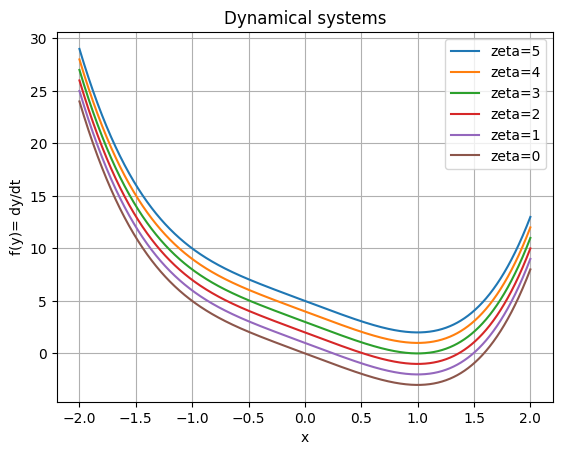

In [4]:
x = np.linspace(-2,2,1000)
list_r = [5,4,3,2,1,0]
for r in list_r:
    list_f4 = [f_y(i, r) for i in x]
    plt.plot(x, list_f4, label = f"zeta={r}")
plt.grid()
plt.xlabel("x")
plt.ylabel("f(y)= dy/dt")
plt.title("Dynamical systems")
plt.legend()

C:\Users\corin\AppData\Local\Temp\ipykernel_20484\1161672373.py:8: RuntimeWarning: divide by zero encountered in log
  plt.plot(r_1, [np.log(i) for i in r_1], "b--")


Text(0, 0.5, 'x')

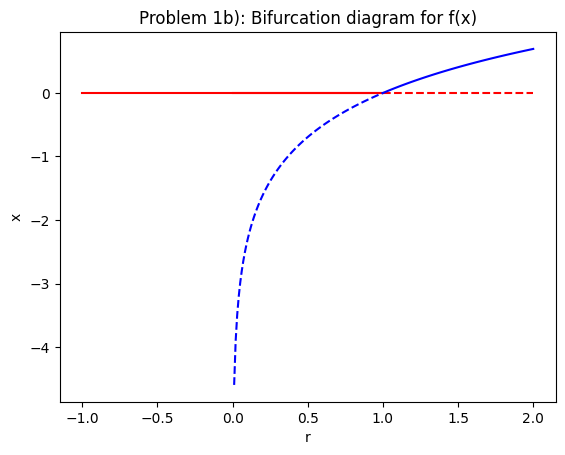

In [5]:
#Bifurcation plot
r_0 = np.linspace(-1,1,100)
r_1 = np.linspace(0, 1, 100)
r_2 = np.linspace(1,2,100)
plt.plot(r_0, np.zeros(len(r_0)), "r")
plt.plot(r_1,np.zeros(len(r_1)), "r")
plt.plot(r_2, np.zeros(len(r_2)), "r--")
plt.plot(r_1, [np.log(i) for i in r_1], "b--")
plt.plot(r_2, [np.log(i) for i in r_2], "b")
plt.title("Problem 1b): Bifurcation diagram for f(x)")
plt.xlabel("r")
plt.ylabel("x")

Text(0.5, 1.0, 'Problem 1b): Bifurcation diagram for f(y)')

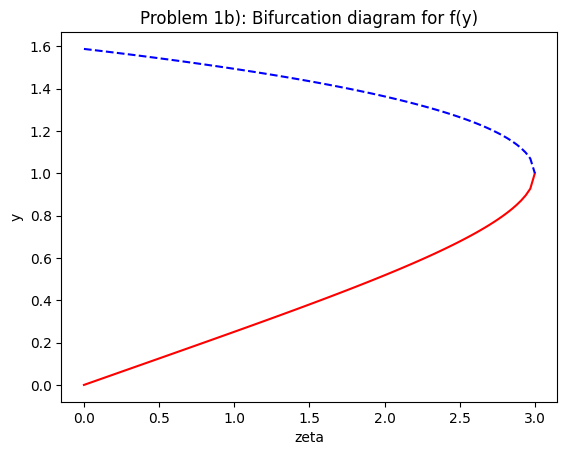

In [6]:
zeta_1 = np.linspace(0,3,100)
zeta_2 = np.linspace(3,6,100)

def f(y, zeta):
    return y**4 -4*y + zeta

y_1 = []
y_2 = []
for z in zeta_1:
    y_left = fsolve(f, -1, args=(z,))
    y_1.append(y_left)
    y_right = fsolve(f, 3, args=(z,))
    y_2.append(y_right)

plt.plot(zeta_1, y_1, "r")
plt.plot(zeta_1, y_2, "b--")
plt.xlabel("zeta")
plt.ylabel("y")
plt.title("Problem 1b): Bifurcation diagram for f(y)")

f(x): Transcritical bifurcation (?)
f(y): Saddle node bifurcation

## Problem 2

b) If we want to determine the fixed points we set $f(n)=0$. Adding $P(n)$ to both sides and dividing by $n$ yields $r(1-n/k)=\frac{n}{1+n^2}$. Therefore $n=0$, as well as the intersection of these functions, are the fixed points of the system

Text(0, 0.5, 'Problem 2b)')

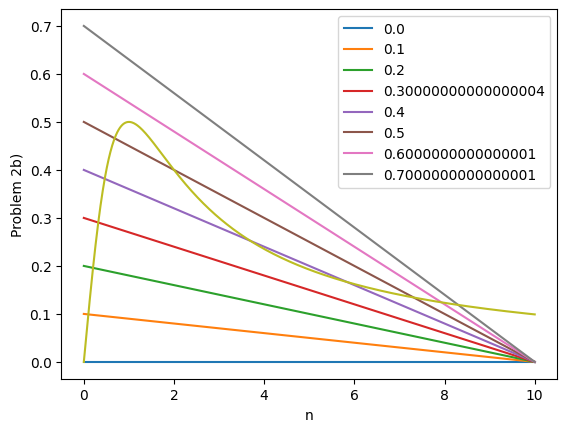

In [7]:
def left_function(n, r, k):
    return r*(1-n/k)

def right_function(n):
    return n/(1+n**2)

list_r = 0.1*np.array([0,1,2,3,4,5,6,7])

x = np.linspace(0,10,1000)
for r in list_r:
    plt.plot(x, [left_function(i, r, 10) for i in x], label = f"{r}")
plt.plot(x, [right_function(i) for i in x])
plt.legend()
plt.xlabel("n")
plt.ylabel("Problem 2b)")

## Problem 3

Text(0.5, 1.0, 'Bifurcation diagram for h=0')

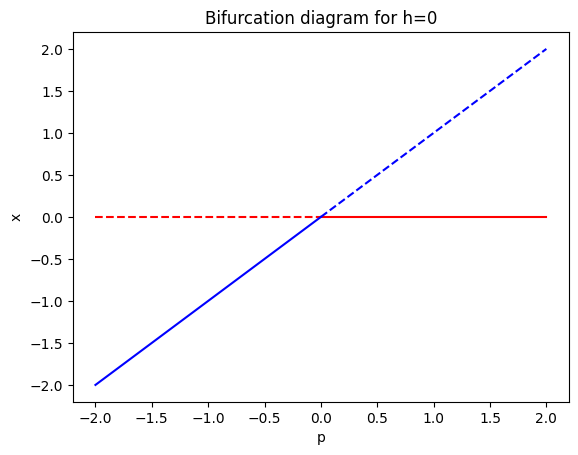

In [8]:
#Bifurcation diagram for h=0
x_neg = np.linspace(-2,0,10)
x_pos = np.linspace(0,2,10)
plt.plot(x_neg, np.zeros(len(x_neg)), "r--")
plt.plot(x_pos, np.zeros(len(x_pos)), "r")
plt.plot(x_neg, x_neg, "b")
plt.plot(x_pos, x_pos, "b--")
plt.xlabel("p")
plt.ylabel("x")
plt.title("Bifurcation diagram for h=0")

Text(0.5, 1.0, 'Bifurcation diagram for h=1')

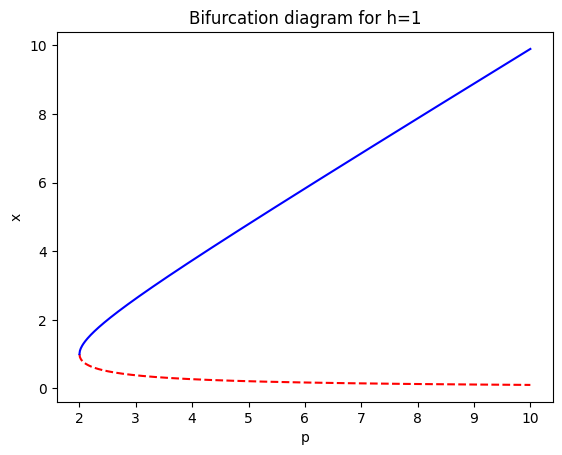

In [9]:
def x_neg(p):
    return (p - np.sqrt(p*p -4))/2
def x_pos(p):
    return  (p + np.sqrt(p*p -4))/2

p = np.linspace(2, 10, 1000)
plt.plot(p, [x_neg(pi) for pi in p], "r--")
plt.plot(p, [x_pos(pi) for pi in p], "b")
plt.xlabel("p")
plt.ylabel("x")
plt.title("Bifurcation diagram for h=1")

Text(0.5, 1.0, 'Bifurcation diagram for h=-1')

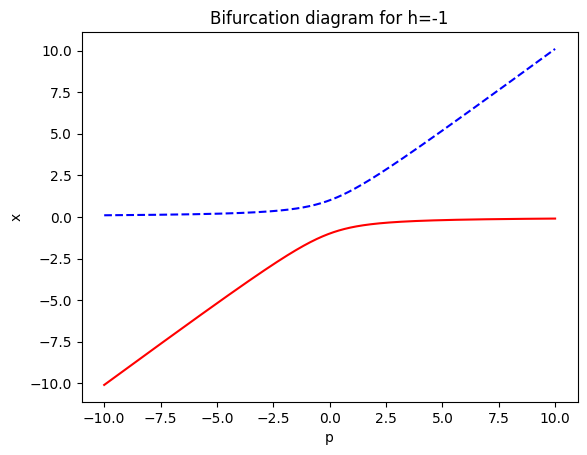

In [10]:
def x_neg(p):
    return (p - np.sqrt(p*p + 4))/2
def x_pos(p):
    return  (p + np.sqrt(p*p +4))/2

p = np.linspace(-10, 10, 1000)
plt.plot(p, [x_neg(pi) for pi in p], "r")
plt.plot(p, [x_pos(pi) for pi in p], "b--")
plt.xlabel("p")
plt.ylabel("x")
plt.title("Bifurcation diagram for h=-1")

$h=0$: We see a transcritical bifurcation
$h=1$: saddle-node bifurcation
$h=-1$: No bifurcation, because there are always two fixed points

Text(0.5, 1.0, 'Problem 3b')

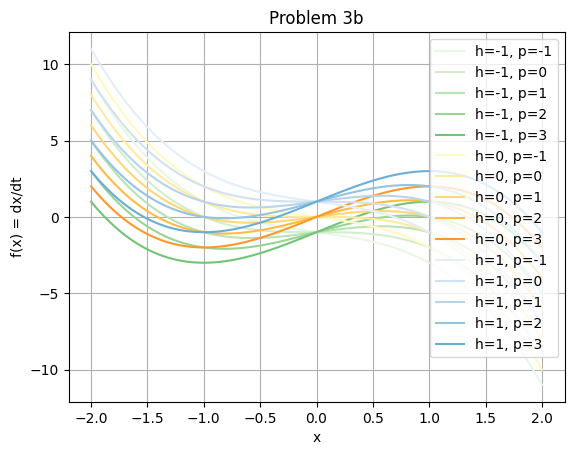

In [26]:
def f_3b(x, h, p):
    return p*x - x**3 + h

list_h = [-1,0,1]
list_p = [-1,0,1,2,3]
#colors = {-1: "blue", 0: "red", 1: "orange"}
x = np.linspace(-2,2,100)

dict_colormaps = {1: "Blues", 0: "YlOrBr", -1: "Greens"}
dict_colors = {-1: 0.1, 0: 0.2, 1: 0.3, 2: 0.4, 3: 0.5}

for h in list_h:
    for p in list_p:
        plt.plot(x, [f_3b(i, h, p) for i in x],color=plt.get_cmap(dict_colormaps[h])(dict_colors[p]), label = f"h={h}, p={p}")
plt.grid()
plt.xlabel("x")
plt.ylabel("f(x) = dx/dt")
plt.legend()
plt.title("Problem 3b")

For $p>0, h=0$, there are two fixed points emerging from the bifurcation at $x=0$, while for $p<0$ there are no other fixed points. 


For $h \neq 0$, the bifurcation at $x=0$ disappears. If we change $h$ to $+1$ or $-1$, we need $p \gtrapprox 2$  in order to have three fixed points. For $p \approx 2$, there is one stable fixed point and one bifurcation. Else, for $p \lessapprox 2$ we have one stable fixed point only.

Text(0.5, 1.0, 'Bifurcation diagram for $h=1$')

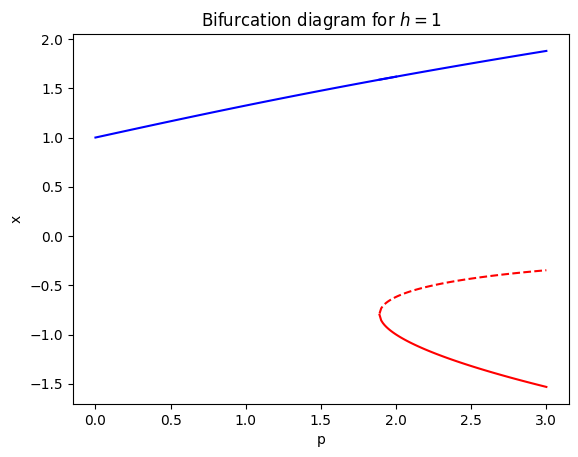

In [37]:
p_lower = np.linspace(0,2,100)
p_higher = np.linspace(1.89,3,100)

x_lower = []
x1_higher = []
x2_higher = []
x3_higher = []

for p in p_lower:
    xl = fsolve(f_3b, 1.4, args= (1, p))
    x_lower.append(xl)
    
for p in p_higher:
    xh1 = fsolve(f_3b, 2, args=(1, p))
    x1_higher.append(xh1)
    xh2 = fsolve(f_3b, -10, args=(1,p))
    x2_higher.append(xh2)
    xh3 = fsolve(f_3b, 0, args=(1,p))
    x3_higher.append(xh3)
    
plt.plot(p_lower, x_lower, "blue")
plt.plot(p_higher, x1_higher, "blue")
plt.plot(p_higher, x2_higher, "red")
plt.plot(p_higher, x3_higher, "r--")
plt.xlabel("p")
plt.ylabel("x")
plt.title("Bifurcation diagram for $h=1$")

Text(0.5, 1.0, 'Bifurcation diagram for $h=-1$')

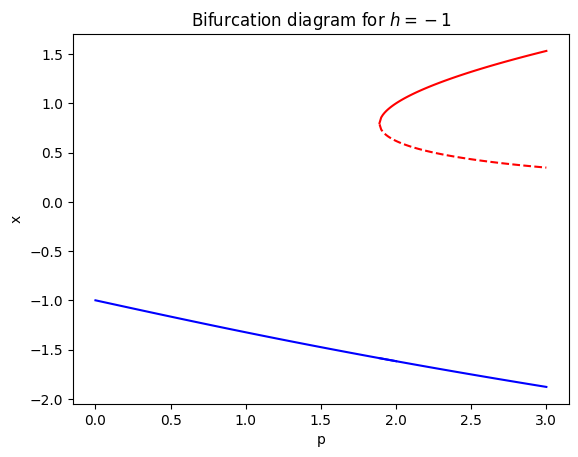

In [41]:
p_lower = np.linspace(0,2,100)
p_higher = np.linspace(1.89,3,100)

x_lower = []
x1_higher = []
x2_higher = []
x3_higher = []

for p in p_lower:
    xl = fsolve(f_3b, -10, args= (-1, p))
    x_lower.append(xl)
    
for p in p_higher:
    xh1 = fsolve(f_3b, 2, args=(-1, p))
    x1_higher.append(xh1)
    xh2 = fsolve(f_3b, -10, args=(-1,p))
    x2_higher.append(xh2)
    xh3 = fsolve(f_3b, 0, args=(-1,p))
    x3_higher.append(xh3)
    
plt.plot(p_lower, x_lower, "blue")
plt.plot(p_higher, x1_higher, "red")
plt.plot(p_higher, x2_higher, "blue")
plt.plot(p_higher, x3_higher, "r--")
plt.xlabel("p")
plt.ylabel("x")
plt.title("Bifurcation diagram for $h=-1$")

## Problem 4

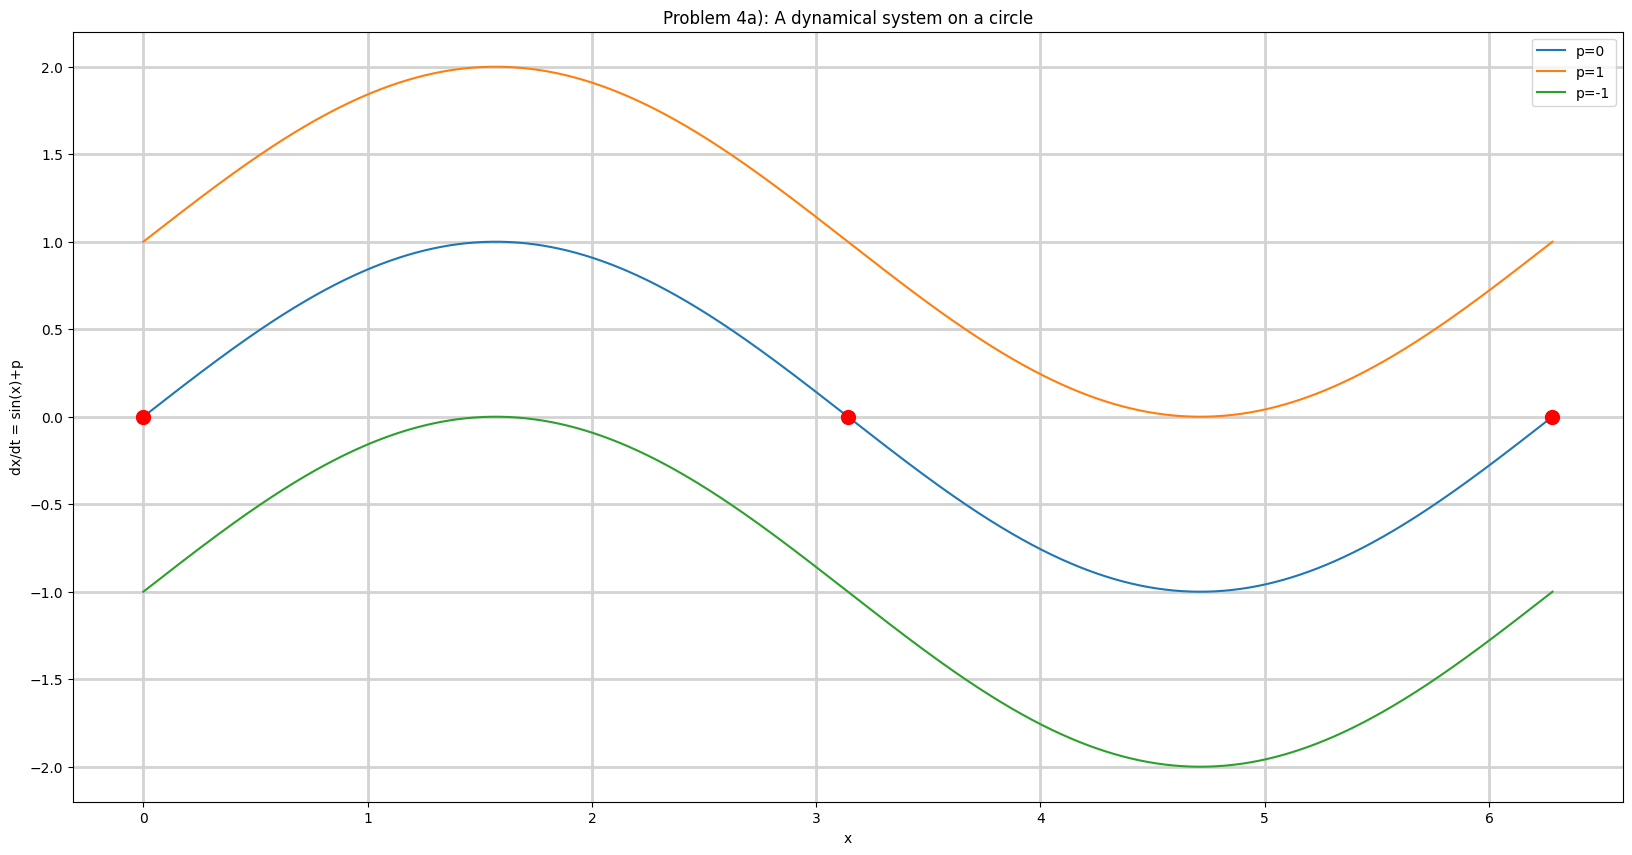

In [13]:
y = np.linspace(0,2*np.pi,1000)
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(y, np.sin(y), label = "p=0")
ax.plot(y, np.sin(y)+1, label = "p=1")
ax.plot(y, np.sin(y)-1, label = "p=-1")
ax.grid(color='lightgrey', linestyle='-', linewidth=2)
ax.set_xlabel("x")
ax.set_ylabel("dx/dt = sin(x)+p")
ax.legend()
ax.set_title("Problem 4a): A dynamical system on a circle")

fixed_points = [k*np.pi for k in range(3)]
for f in fixed_points:
    b = -1 if f<5 else 1
    ax.plot([f], [0], 'ro', markersize = 10)

Bifurcations appear for $p=1$ and $p=-1$, because then the minima or maxima of the sine tangent with the $x=0$-axis. In assignment 1 I argued that the fixed points (for $p=0$) are at $x = n \pi, n \in \mathbb{Z}$. Due to the symmetry of the sine, the bifurcations are at $x^* = (\frac{1}{2}+k) \pi $, whereas $k$ is an even number if $p<0$ and odd for $p>0$

Text(0.5, 1.0, 'Bifurcation diagram for 0<$theta$<2$\\pi$')

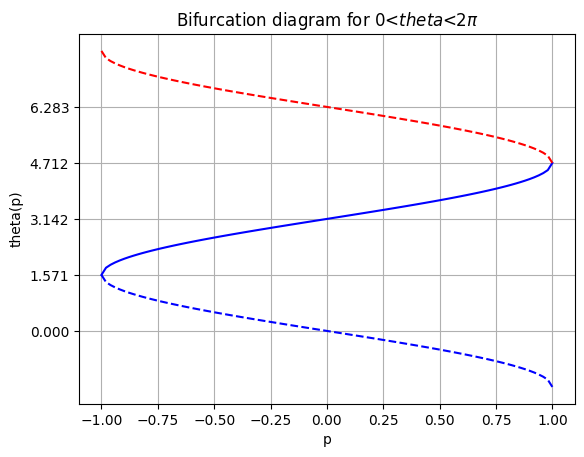

In [14]:
list_p = np.linspace(-1,1,100)
list_theta_1 = [np.arcsin(p)+np.pi for p in list_p]
list_theta_2 = [-np.arcsin(p) for p in list_p]
list_theta_3 = [-np.arcsin(p)+np.pi for p in list_p]
list_theta_4 = [2*np.pi-np.arcsin(p) for p in list_p]

plt.plot(list_p, list_theta_1, "b")
plt.plot(list_p, list_theta_2, "b--")
#plt.plot(list_p, list_theta_3, "b")
plt.plot(list_p, list_theta_4, "r--")
plt.xlabel("p")
plt.ylabel("theta(p)")
plt.grid()
plt.yticks([k*np.pi for k in [0,0.5,1,1.5,2]])
plt.title("Bifurcation diagram for 0<$theta$<2$\pi$")

Text(0.5, 1.0, 'Phase space diagram for $p=1$')

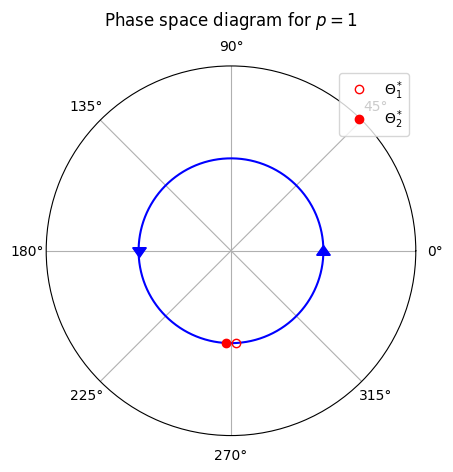

In [15]:
p = np.array([-0.999, 0.999])
t = np.linspace(0, 2*np.pi, 1000)
delta = 0.05
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(t[10], 1, "blue", marker=6, markersize=10)
ax.plot(t[510], 1,"blue", marker=7, markersize=10)
ax.plot(t, np.ones(len(t)),"blue")
ax.plot(3*np.pi/2+delta, 1, "ro",fillstyle="none", label = "$\Theta^*_1$")
ax.plot(3*np.pi/2-delta, 1, "ro", label = "$\Theta^*_2$")
ax.set_rmax(2)
ax.set_rticks([]) 
ax.set_rlabel_position(-22.5) 
ax.grid(True)
ax.legend()

ax.set_title("Phase space diagram for $p=1$", va='bottom')

Text(0.5, 1.0, 'Phase space diagram for $p=-1$')

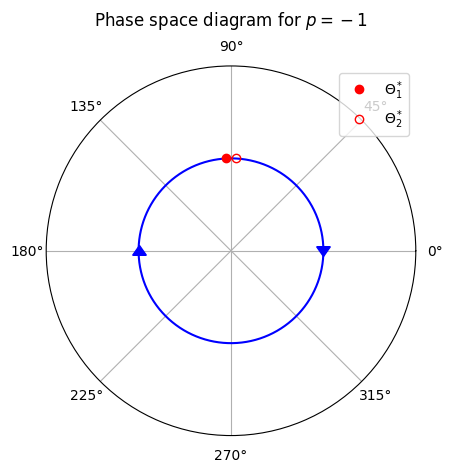

In [16]:
t = np.linspace(0, 2*np.pi, 1000)
delta = 0.05

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(t, np.ones(len(t)), "blue")
ax.plot(t[990], 1, "blue", marker=7, markersize=10)
ax.plot(t[490], 1,"blue", marker=6, markersize=10)
ax.plot(np.pi/2+delta, 1, "ro", label = "$\Theta^*_1$")
ax.plot(np.pi/2-delta, 1, "ro", fillstyle="none", label = "$\Theta^*_2$")
ax.set_rmax(2)
ax.set_rticks([]) 
ax.set_rlabel_position(-22.5)  
ax.grid(True)
ax.legend()

ax.set_title("Phase space diagram for $p=-1$", va='bottom')

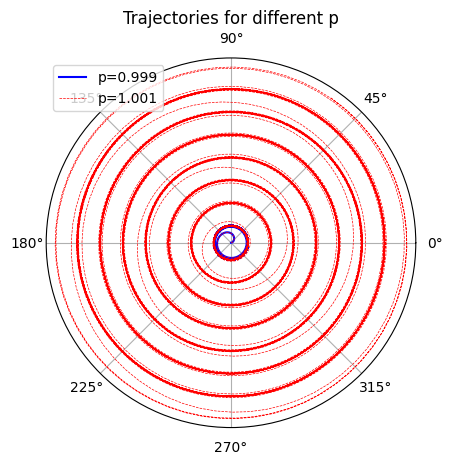

In [17]:
def circle(theta, t, p):
    return p + np.sin(theta)

list_theta = np.linspace(0, 1000, 10000)
vals = odeint(circle,0.01,list_theta, args=(0.999,))
vals_2 = odeint(circle,0.01,list_theta, args=(1.001,))

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(list_theta, vals, "blue", label="p=0.999")
ax.plot(list_theta, vals_2, "r--", label="p=1.001", linewidth = 0.5)
ax.set_rticks([])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)
ax.legend(loc="best")
ax.set_title("Trajectories for different p")

#def animate(i):
    #ax.cla() # clear the previous image
 #   ax.plot(list_theta[:i], vals[:i], "blue") # plot the line
    #ax.set_xlim([x0, tfinal]) # fix the x axis
    #ax.set_ylim([1.1*np.min(y), 1.1*np.max(y)]) # fix the y axis

#anim = animation.FuncAnimation(fig, animate, frames = len(list_theta) + 1, interval = 1, blit = False)
plt.show()

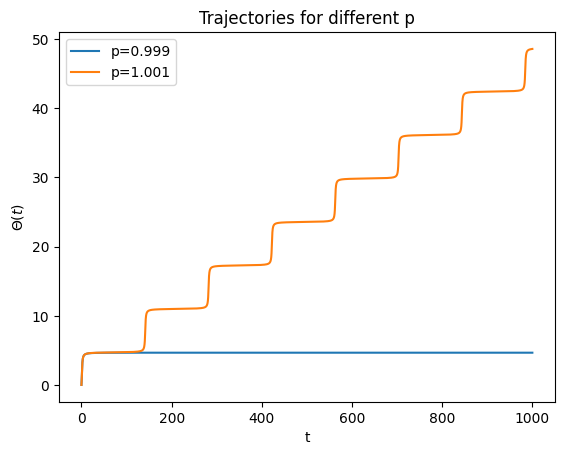

In [18]:
fix, ax = plt.subplots()
ax.plot(list_theta, vals, label="p=0.999")
ax.plot(list_theta, vals_2, label="p=1.001")
ax.set_xlabel("t")
ax.set_ylabel("$\Theta(t)$")
ax.set_title("Trajectories for different p")
ax.legend()

There are values of $\Theta$ where the trajectory with $p=1.001$ spends a lot of time, still leaving it after that time. Therefore, one might think it is a fixed point, but it actually isn't. If we perturb the system by a little bit around $p=1$, the system changes dramatically. The figure above shows that the system for $p=0.999$ stays at that value for $\Theta$. Therefore, a "ghost" of a saddle-node bifurcation is a point where, depending on the parameters of the system, a fixed point can either occur or not.